## Data Selection/Engineering

In [1]:
%%capture
#Load data_preprocessing file
%run data_preprocessing.ipynb

In [2]:
#Drop NaN values in the dataset
dataset = dataset.dropna()

In [3]:
#Get independent and dependent variables
X = dataset.drop("Churn", axis = 1)
y = dataset["Churn"]

#### Feature Selection using stepwise

In [4]:
#Select features using stepwise selection(Forward regression)
selected = step_reg.forward_regression(X, y, 0.05, verbose=True)

Add  OnlineSecurity                 with p-value 0.0
Add  Contract                       with p-value 6.0656e-263
Add  TechSupport                    with p-value 3.3444e-62
Add  tenure                         with p-value 5.99771e-49
Add  InternetService                with p-value 1.30127e-37
Add  MonthlyCharges                 with p-value 3.78476e-28
Add  TotalCharges                   with p-value 2.37998e-20
Add  MultipleLines                  with p-value 1.26847e-15
Add  PaperlessBilling               with p-value 1.7142e-09
Add  SeniorCitizen                  with p-value 4.15152e-06
Add  OnlineBackup                   with p-value 2.38556e-05
Add  Dependents                     with p-value 0.0143751


#### Dimensionality Reduction using PCA

In [5]:
#Initialize PCA
pca = PCA(n_components = 2, whiten=False, random_state=42)
#Fit and transform the feature matrix
X_pca = pca.fit_transform(X)

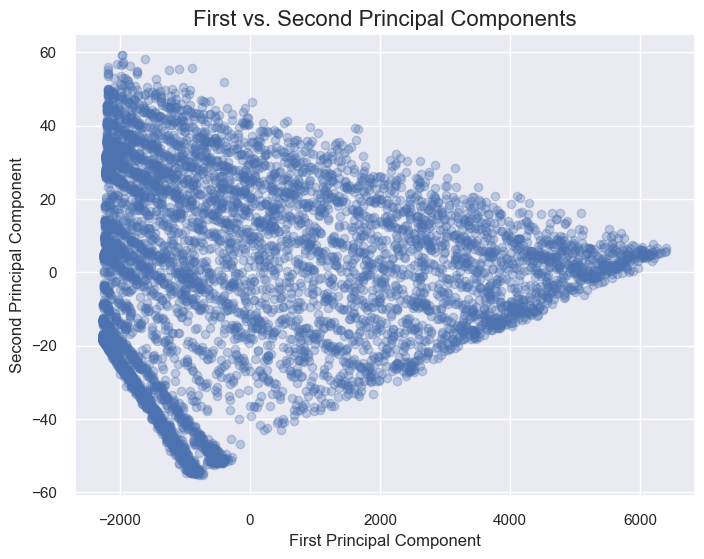

In [6]:
#Extract the first and second components
first_component = X_pca[:, 0]
second_component = X_pca[:, 1]

#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(first_component, second_component, alpha=0.3)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("First vs. Second Principal Components", fontsize=16)
plt.show()

#### K-Means Clustering

In [7]:
#Use elbow technique to evaluate the K number
def plotElbow(data, metric):
    model=KMeans()
    visualizer=KElbowVisualizer(model, k=(2,15), metric=metric, timings=True)
    visualizer.fit(data)
    visualizer.show()

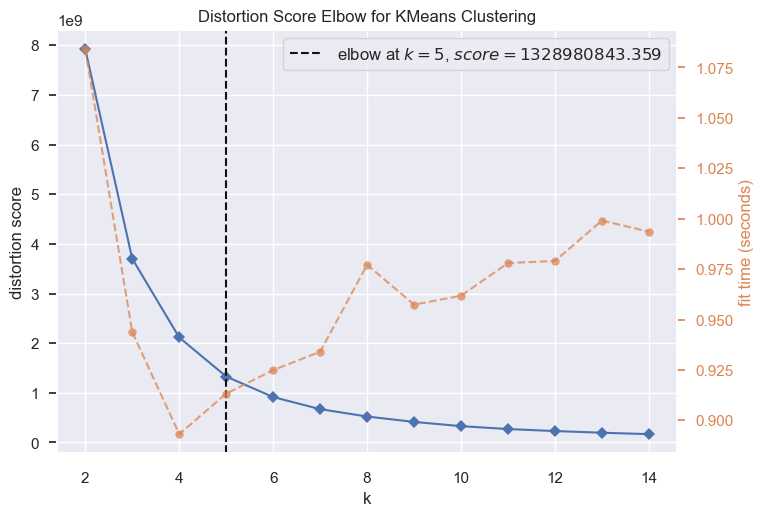

In [8]:
#metric="silhouette"
#metric="calinski_harabasz"
metric="distortion"
plotElbow(X, metric)

In [9]:
#Create K-means object
kmeans = KMeans(n_clusters=5)
#Fit the K-Means model
kmeans.fit(X)  # X is your feature matrix
#Get cluster assigned to each data point
cluster_assignments = kmeans.labels_

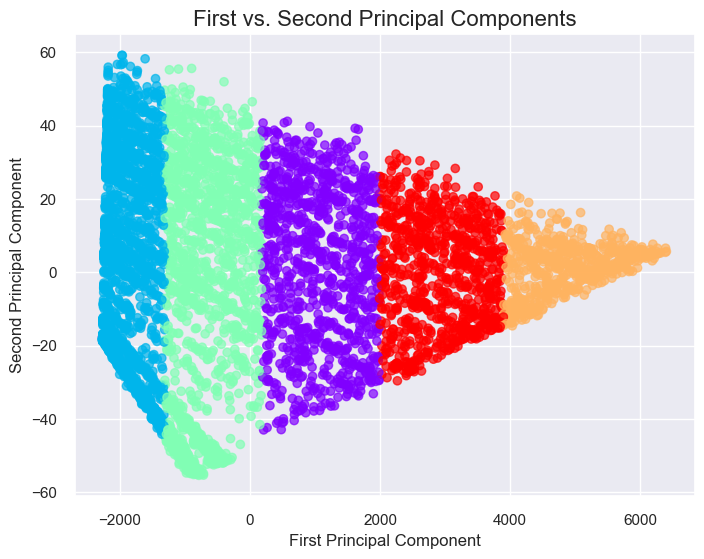

In [10]:
#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(first_component, second_component, c=cluster_assignments, cmap="rainbow", alpha=0.7)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("First vs. Second Principal Components", fontsize=16)
plt.show()

###### When 3 principal components are chosen

In [11]:
#Initialize PCA
pca = PCA(n_components = 3, whiten=False, random_state=42)
#Fit and transform the feature matrix
X_pca_3 = pca.fit_transform(X)

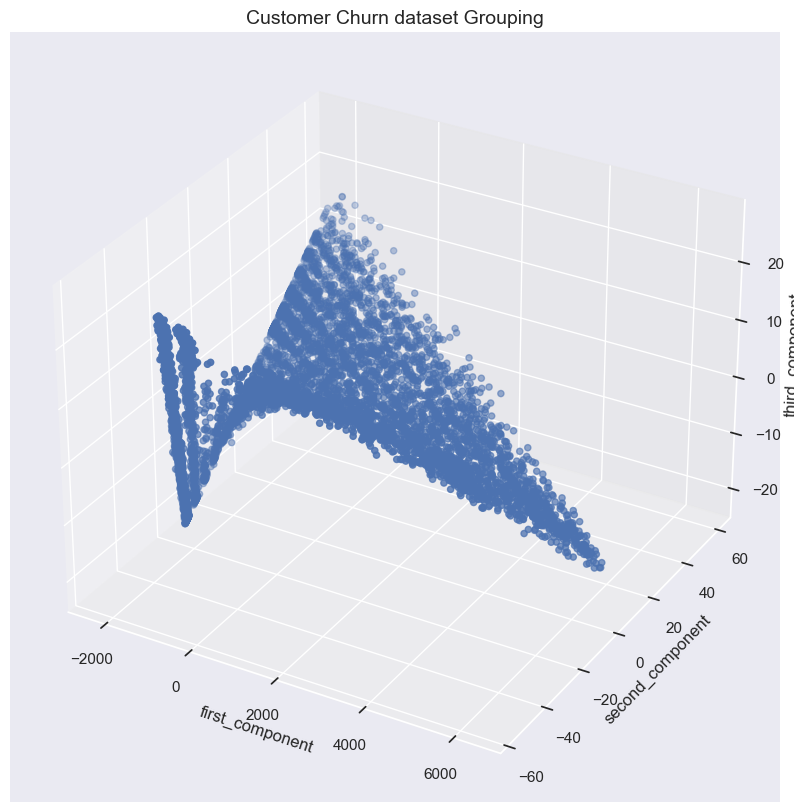

In [12]:
#Extract the first, second and third components
first_component = X_pca_3[:, 0]
second_component = X_pca_3[:, 1]
third_component = X_pca_3[:, 2]

#Create 3D scatter plot
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("Customer Churn dataset Grouping", fontsize=14)
ax.scatter(first_component, \
           second_component, \
           third_component, )
ax.set_xlabel("first_component")
ax.set_ylabel("second_component")
ax.set_zlabel("third_component")
plt.show()

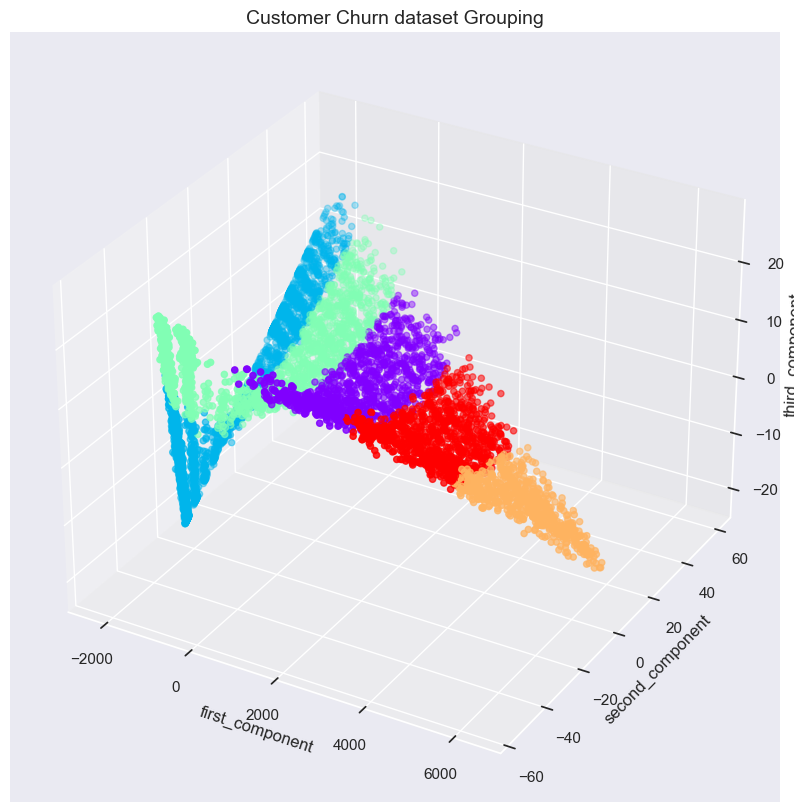

In [13]:
#Create 3D scatter plot
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")
ax.set_title("Customer Churn dataset Grouping", fontsize=14)
ax.scatter(first_component, \
           second_component, \
           third_component, \
           c=cluster_assignments, cmap="rainbow")
ax.set_xlabel("first_component")
ax.set_ylabel("second_component")
ax.set_zlabel("third_component")
plt.show()